# Word Happiness

Toda la información del dataset puede ser ampliada desde el siguiente enlace: https://www.kaggle.com/unsdsn/world-happiness

### Contexto

El Informe Mundial de la Felicidad es una encuesta histórica sobre el estado de la felicidad global. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la actualización de 2016. El World Happiness 2017, que clasifica a 155 países según sus niveles de felicidad, se lanzó en las Naciones Unidas en un evento que celebra el día internacional de la felicidad el 20 de marzo. El informe continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar de sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones de bienestar se pueden usar de manera efectiva para evaluar el progreso de las naciones.

### Contenido

Los puntajes y clasificaciones de felicidad utilizan datos de la encuesta mundial Gallup. Las puntuaciones se basan en las respuestas a la pregunta principal de evaluación de la vida formulada en la encuesta. Esta pregunta, conocida como la escalera de Cantril, les pide a los encuestados que piensen en una escalera con la mejor vida posible para ellos con un 10 y la peor vida posible con un 0 y que califiquen sus propias vidas actuales en esa escala. Las puntuaciones provienen de muestras representativas a nivel nacional para los años 2013-2016 y utilizan los pesos de Gallup para hacer que las estimaciones sean representativas. Las columnas que siguen la puntuación de felicidad estiman el grado en que cada uno de los seis factores (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad) contribuyen a que las evaluaciones de vida sean más altas en cada país que en la distopía, un país hipotético que tiene valores iguales a los promedios nacionales más bajos del mundo para cada uno de los seis factores. No tienen impacto en el puntaje total reportado para cada país, pero sí explican por qué algunos países tienen una clasificación más alta que otros.

### ¿Qué es la distopía?

La distopía es un país imaginario que tiene las personas menos felices del mundo. El propósito de establecer la distopía es tener un punto de referencia con el que todos los países puedan ser comparados favorablemente (ningún país tiene un desempeño más pobre que la distopía) en términos de cada una de las seis variables clave, lo que permite que cada barra sea de ancho positivo. Las puntuaciones más bajas observadas para las seis variables clave, por lo tanto, caracterizan la distopía. La vida sería muy desagradable en un país con los ingresos más bajos del mundo, la esperanza de vida más baja, la generosidad más baja, la mayoría de la corrupción, la menor libertad y el menor apoyo social, en contraste con la utopía.

### Ejercicio práctico

Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones:


In [1]:
#!pip install plotnine 

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

* Cargar los dos CSV como datasets.

In [3]:
df_2015 = pd.read_csv("2015.csv")
df_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [4]:
df_2016 = pd.read_csv("2016.csv")
df_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


* Identificra las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [5]:
# Ver columnas
df_2015.columns#.sort_values(ascending=True)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
# Ver cantidad de filas y columnas
df_2015.shape

(158, 12)

In [7]:
# Ver columnas
df_2016.columns#.sort_values(ascending=True)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [8]:
# Ver cantidad de filas y columnas
df_2016.shape

(157, 13)

* Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [9]:
df = pd.concat([df_2015, df_2016], ignore_index=True, join='outer')
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN


* Revisa el número de nulos que hay por cada columna, así como su porcentaje.


In [10]:
def nulos(df):
    # Cantidad de nulos
    total = df.isnull().sum()
    # Porcentaje de nulos
    porcentaje = total/len(df)*100
    return total, porcentaje

In [11]:
# Cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna")
nulos(df)[0]

Cantidad de valores nulos por columna


Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64

In [12]:
# Porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna")
nulos(df)[1]

Porcentaje de valores nulos por columna


Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)          0.00000
Freedom                           0.00000
Trust (Government Corruption)     0.00000
Generosity                        0.00000
Dystopia Residual                 0.00000
Lower Confidence Interval        50.15873
Upper Confidence Interval        50.15873
dtype: float64

* Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).

In [13]:
max = df['Lower Confidence Interval'].max()
min = df['Lower Confidence Interval'].min()
df['Lower Confidence Interval'] = df['Lower Confidence Interval'].fillna(np.random.randint(min, max))

In [14]:
max = df['Upper Confidence Interval'].max()
min = df['Upper Confidence Interval'].min()
df['Upper Confidence Interval'] = df['Upper Confidence Interval'].fillna(np.random.randint(min, max))

In [15]:
nulos(df)[0]

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
dtype: int64

* Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [16]:
media = df['Standard Error'].mean()**2
df['Standard Error'] = df['Standard Error'].fillna(media)

In [17]:
nulos(df)[0]

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64

* Obtén un resumen estadístico del dataframe sin valores nulos.

In [18]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,4.137575,5.240222
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,1.400453,0.836633
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,3.000000,5.000000
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,3.000000,5.000000
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,5.231500,5.408500
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


* Muestra de forma gráfica la relación entre la familia y la salud.

C:\Users\USER\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


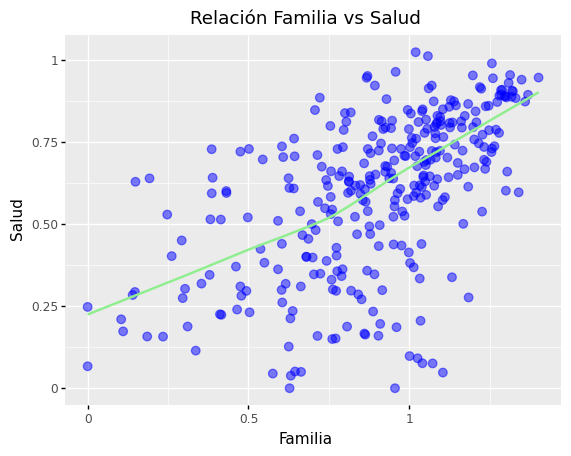

<ggplot: (151803261311)>

In [19]:
(
    ggplot(df) +
    geom_point(
        aes(x="Family", y="Health (Life Expectancy)"),
        color = 'blue',
        alpha = 0.5,
        size=3
    )
    + labs(title="Relación Familia vs Salud", x="Familia", y="Salud")
    + geom_smooth(
        aes(x="Family", y="Health (Life Expectancy)"),
        color = 'lightgreen',
        alpha = 0
    )
)

* Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).

C:\Users\USER\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


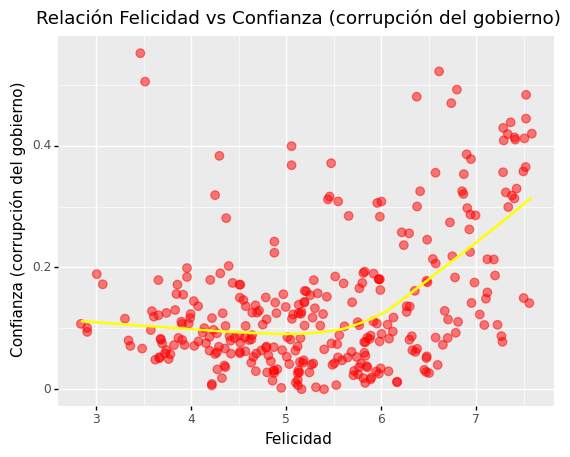

<ggplot: (151803327425)>

In [20]:
(
    ggplot(df) +
    geom_point(
        aes(x="Happiness Score", y="Trust (Government Corruption)"),
        color = 'red',
        alpha = 0.5,
        size=3
    )
    + labs(title="Relación Felicidad vs Confianza (corrupción del gobierno)", x="Felicidad", y="Confianza (corrupción del gobierno)")
    + geom_smooth(
        aes(x="Happiness Score", y="Trust (Government Corruption)"),
        color = 'yellow',
        alpha = 0.8
    )
)

* Muestra la matriz de correlación del daframe.

Text(0.5, 1.0, 'Matriz de Correlación')

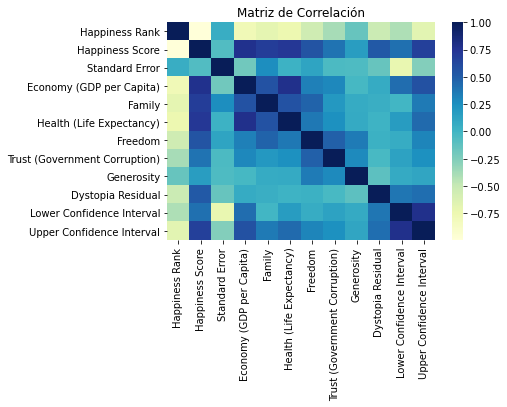

In [21]:
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.title("Matriz de Correlación")

* Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [22]:
# Ordenar dataframe por país para visualizar con mayor facilidad
df = df.sort_values("Country", axis=0)
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
152,Afghanistan,Southern Asia,153,3.575,0.030840,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.000,5.000
311,Afghanistan,Southern Asia,154,3.360,0.002293,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.288,3.432
266,Albania,Central and Eastern Europe,109,4.655,0.002293,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,4.546,4.764
94,Albania,Central and Eastern Europe,95,4.959,0.050130,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,3.000,5.000
195,Algeria,Middle East and Northern Africa,38,6.355,0.002293,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,6.227,6.483
67,Algeria,Middle East and Northern Africa,68,5.605,0.050990,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,3.000,5.000
298,Angola,Sub-Saharan Africa,141,3.866,0.002293,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,3.753,3.979
136,Angola,Sub-Saharan Africa,137,4.033,0.047580,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,3.000,5.000
29,Argentina,Latin America and Caribbean,30,6.574,0.046120,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,3.000,5.000
183,Argentina,Latin America and Caribbean,26,6.650,0.002293,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,6.560,6.740


In [23]:
# Obtener otro dataframe con la agrupación del país y la puntuación máxima de felicidad
df_max = df.groupby("Country", as_index=False).agg({'Happiness Score' : 'max'})
# Filtrar el dataframe con países duplicados por el dataframe con valores máximos
df = pd.merge(df,df_max, on=['Country', 'Happiness Score'], how='inner')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Afghanistan,Southern Asia,153,3.575,0.030840,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.000,5.000
1,Albania,Central and Eastern Europe,95,4.959,0.050130,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,3.000,5.000
2,Algeria,Middle East and Northern Africa,38,6.355,0.002293,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,6.227,6.483
3,Angola,Sub-Saharan Africa,137,4.033,0.047580,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,3.000,5.000
4,Argentina,Latin America and Caribbean,26,6.650,0.002293,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,6.560,6.740
5,Armenia,Central and Eastern Europe,121,4.360,0.002293,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864,4.266,4.454
6,Australia,Australia and New Zealand,9,7.313,0.002293,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,7.241,7.385
7,Austria,Western Europe,13,7.200,0.037510,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,3.000,5.000
8,Azerbaijan,Central and Eastern Europe,81,5.291,0.002293,1.12373,0.76042,0.54504,0.35327,0.17914,0.05640,2.27350,5.226,5.356
9,Bahrain,Middle East and Northern Africa,42,6.218,0.002293,1.44024,0.94397,0.65696,0.47375,0.25772,0.17147,2.27405,6.128,6.308


* ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

C:\Users\USER\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


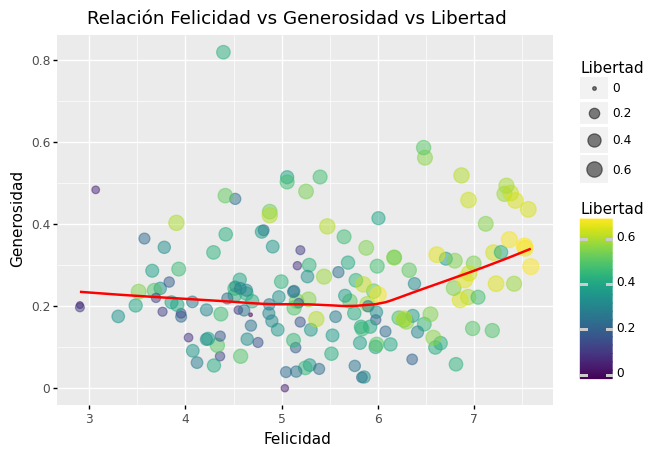

<ggplot: (151804491620)>

In [24]:
(
    ggplot(df) +
    geom_point(
        aes(x="Happiness Score", y="Generosity", colour="Freedom", size='Freedom'),
        alpha = 0.5
    )
    + labs(colour = 'Libertad', size='Libertad')
    + labs(title="Relación Felicidad vs Generosidad vs Libertad", x="Felicidad", y="Generosidad")
    + geom_smooth(
        aes(x="Happiness Score", y="Generosity"),
        color = 'red',
        alpha = 0.8
    )
)

* Muestra la distribución del grado de distopía en función de la región.

C:\Users\USER\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


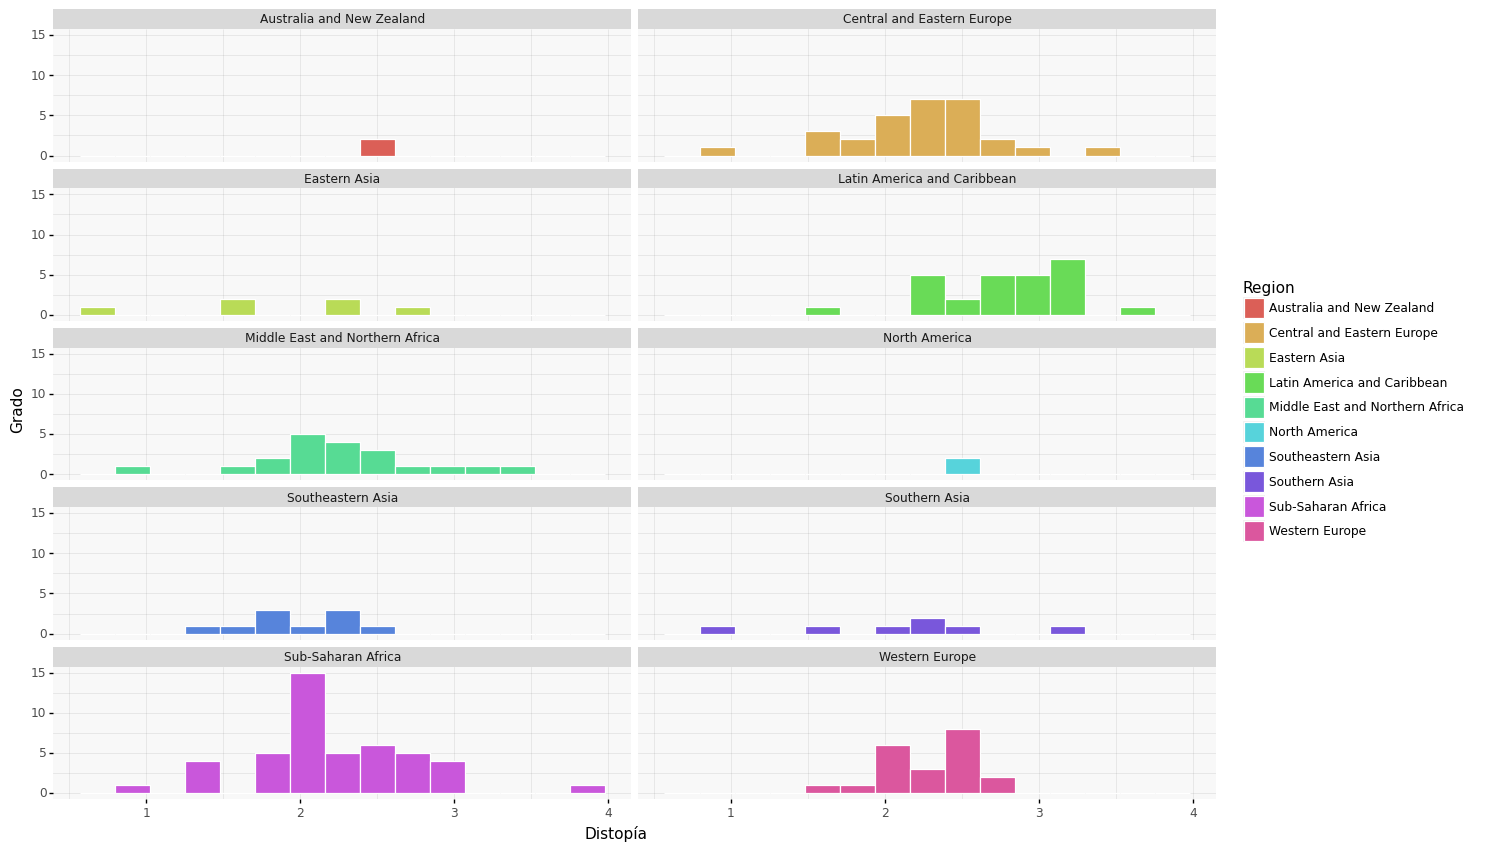

<ggplot: (151804632869)>

In [25]:
# Documentación de estilos para la gráfica: https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html

(
    ggplot(df)
    + geom_histogram(
        mapping=aes('Dystopia Residual', fill = 'Region'), color='white'
    )
    + facet_wrap('~Region', ncol = 2)
    + labs(x='Distopía', y='Grado')
    + theme(
        figure_size=(15, 10),
        panel_background=element_rect(fill="gray", alpha=0.05),
        panel_grid=element_line(color="gray", alpha=0.2, size=0.5)
    )
)